# Exercise 7.1
### Classification of magnetic phases

Imagine a 2- dimensional lattice arrangement of n×n magnetic dipole moments (spins) that can be in one of two states (+1 or −1, Ising model).
With interactions between spins being short ranged, each spin interacts only with its four neighbors.
The probability to find a spin in one of the orientations is a function of temperature T according to p ∼ exp (−a/T ), a = const.).

At extremely low temperatures T → 0, neighboring spins have a very low probability of different orientations, so that a uniform overall state (ferromagnetic state) is adopted, characterized by +1 or −1.
At very high temperatures T → ∞, a paramagnetic phase with random spin alignment results, yielding 50% of +1 and  0% of −1 orientations.
Below a critical temperature 0 < T < Tc, stable ferromagnetic domains emerge, with both orientations being equally probable in the absence of an external magnetic field.
The spin-spin correlation function diverges at Tc, whereas the correlation decays for T > Tc.

The data for this task contain the n × n dipole orientations on the lattice for different temperatures T.
Classify the two magnetic phases (paramagnetic/ferromagnetic)!

In [6]:
from tensorflow import keras
import numpy as np
callbacks = keras.callbacks
layers = keras.layers

print("keras", keras.__version__)

keras 2.4.0


load and prepare dataset

In [2]:
import gdown
url = "https://drive.google.com/u/0/uc?export=download&confirm=HgGH&id=1Ihxt1hb3Kyv0IrjHlsYb9x9QY7l7n2Sl"
output = 'ising_data.npz'
gdown.download(url, output, quiet=True)

f = np.load(output, allow_pickle=True)
n_train = 20000

x_train, x_test = f["C"][:n_train], f["C"][n_train:]
T_train, T_test = f["T"][:n_train], f["T"][n_train:]

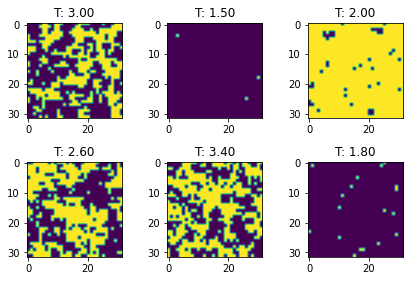

In [3]:
import matplotlib.pyplot as plt

for i,j in enumerate(np.random.choice(n_train, 6)):
    plt.subplot(2,3,i+1)
    image = x_train[j]
    plot = plt.imshow(image)
    plt.title("T: %.2f" % T_train[j])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'frequency')

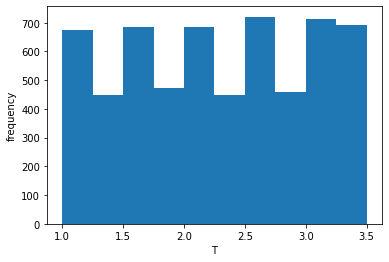

In [4]:
plt.hist(T_test)
plt.xlabel("T")
plt.ylabel("frequency")

#### Set up training data - define magnetic phases

In [5]:
Tc = 2.27
y_train, y_test = T_train > Tc, T_test > Tc

 ### Task

 - evaluate the test accuracy for a fully-connected network,
 - plot the test accuracy vs. temperature.
